# Nora's Notebook

## Introduction

##### For this project, we are required to find some metric that will determine the best neighborhood in Pittsburgh. Our approach to finding our metric was to orignially come up wit ideas and then find datasets that applied. Our first idea was "best neighborhood to have a glow-up" or "best neighborhood to raise a family" However, this proposed to be a challenge because the datasets are limited in what they cover. We struggled to find datasets that were applicable to these metrics. However, we did notice that there is a lot of data regarding traffic and roadways in Pittsburgh neighborhoods. For this reason, we knew we wanted to do something with this information, but also for our metric to be intersting. That is how we decided on our metric "best neighborhood to film Cars 4". 

## Metric

##### As mentioned above, our metric is "best neighborhood to film Cars 4". The features we are measuring based on this metric are number of speed bumps, number of traffic lights, and number of bridges per neighborhood. In our idea of Cars 4, there should be the least number of speed bumps and traffic lights, but more bridges. For these reasons, we are reviewing datasets that cover speed bumps, traffic lights, and city bridges.

## Dataset #1 Speed Bumps

##### When driving, speed bumps require drivers to slow down. However, in the Cars movies, Lightning McQueen is a "Faster than fast and quicker than quick". He has no time to slow down for speed bumps. For this reason, the best neighborhood should have the least number of speed bumps per square area. 

In [6]:
import pandas as pd

humps = pd.read_csv("humps.csv")
humps['neighborhood'].value_counts()

Squirrel Hill South    18
Carrick                 9
Polish Hill             6
North Oakland           6
Upper Hill              4
Brookline               4
Homewood South          4
South Side Slopes       4
Perry North             4
Garfield                3
Squirrel Hill North     3
South Side Flats        3
Mount Washington        3
Bloomfield              3
Highland Park           2
Central Oakland         1
Stanton Heights         1
Overbrook               1
Name: neighborhood, dtype: int64

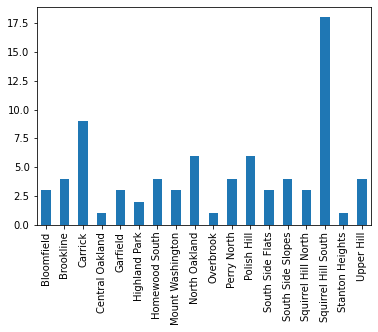

In [5]:
humps["neighborhood"].value_counts().sort_index().plot(kind='bar', rot=90)

## Dataset #2 Scenic Route (Bridges)

##### Cinematography is crucial for making or breaking a movie. For this reason, it is very important that the filming location of Cars 4 is scenic and offers great filming locations. Part of Pittsburgh that offers scenic routes for cars to drive is the city's many bridges. The next dataset records the number of bridges in each neighborhood in Pittsburgh. The neighborhood with the most bridges per square area will be the best for filming Cars 4.

In [8]:
bridge = pd.read_csv("bridge.csv")
bridge['neighborhood'].value_counts()

Squirrel Hill South          14
Central Business District    12
Troy Hill                     7
Overbrook                     6
Hays                          6
Shadyside                     6
Oakwood                       5
South Side Slopes             5
South Side Flats              5
West End                      4
South Oakland                 4
Mount Washington              4
East Allegheny                4
Hazelwood                     4
Bon Air                       3
Larimer                       3
Allegheny Center              3
Sheraden                      3
Polish Hill                   3
Bloomfield                    2
Bluff                         2
Perry South                   2
Lincoln-Lemington-Belmar      2
Swisshelm Park                2
Windgap                       2
Highland Park                 2
Squirrel Hill North           2
Arlington                     2
Allegheny West                2
Greenfield                    2
Marshall-Shadeland            2
East Lib

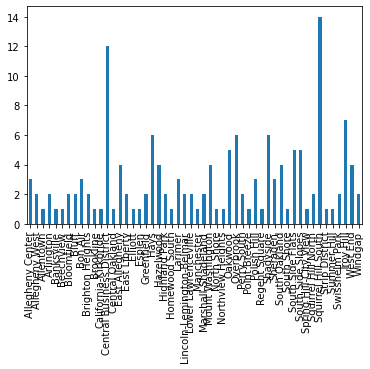

In [9]:
bridge["neighborhood"].value_counts().sort_index().plot(kind='bar', rot=90)